In [1]:
# Uncomment following lines if you are running on Google Colab
# Drive and folder directory may need to be changed
# from google.colab import drive
# drive.mount('/content/drive')
# %ls /content/drive/MyDrive
# %cd /content/drive/MyDrive/10-701-Project
# %pip install tensorboardX
from train import *
import helpers
import copy, glob
from plots import *

#Plotting
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
FIGDIR = 'fig/'

/Users/lguerdan/.virtualenvs/10701-Project/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Running a specific experiment configuration 

In [ ]:
params = {
    'lr': 0.05,
    'dp': True,
    'clipping': 'Linear',
    'num_microbatches': 32,
    'batch_size': 32,
    'S': 1,
    'z': 1.1,
    'gamma': 0.5,
    'lr_c': 0.2,
    'momentum': 0.5,
    'decay': 0,
    'n_epochs' : 20,
}

run_exp('run_a', params, use_devset=True)

## Fetching experiment results for a specific run

AttributeError: 'AxesSubplot' object has no attribute 'gca'

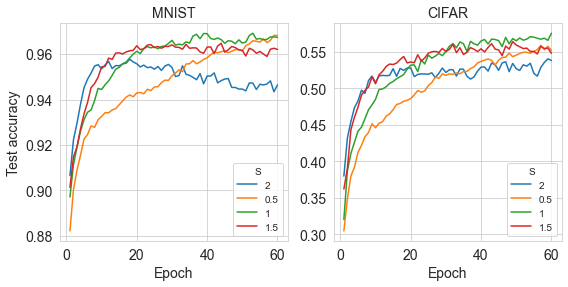

In [2]:
exp, params = helpers.load_exp('central_baseline_fixed')
exp['epoch'] = exp['epoch'] + 1
plot_centralized_fixed_cuttoff_experiment(exp)

In [10]:
exp, params = helpers.load_exp('central_baseline_adaptive_cuttoff')

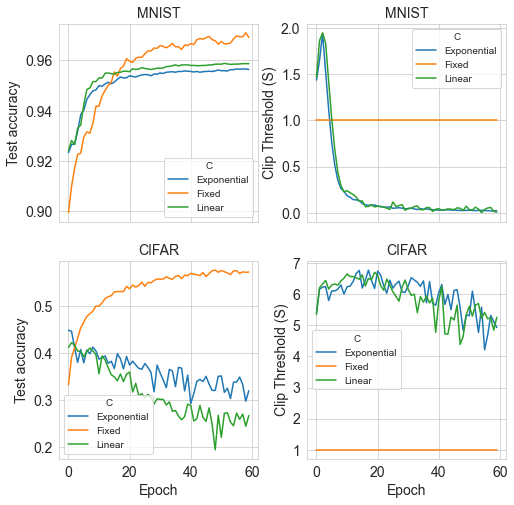

In [46]:
f, axes = plt.subplots(2, 2, figsize=(8,8), sharey=False, sharex=True)
plt.subplots_adjust(wspace = 0.25)

mnist = exp[exp['benchmark'] == 'MNIST'].reset_index()
sns.lineplot(data=mnist, x='epoch', hue='C', y='test_acc', ax=axes[0][0])

mnist = exp[exp['benchmark'] == 'MNIST'].reset_index()
sns.lineplot(data=mnist, x='epoch', hue='C', y='S', ax=axes[0][1])

cifar = exp[exp['benchmark'] == 'CIFAR'].reset_index()
sns.lineplot(data=cifar, x='epoch', hue='C', y='test_acc', ax=axes[1][0])
cifar = exp[exp['benchmark'] == 'CIFAR'].reset_index()
sns.lineplot(data=cifar, x='epoch', hue='C', y='S', ax=axes[1][1])

axes[0][0].set_title('MNIST', fontsize=14)
axes[0][0].set_ylabel('Test accuracy', fontsize=14)
axes[0][0].tick_params(labelsize=14)

axes[0][1].set_title('MNIST', fontsize=14)
axes[0][1].set_ylabel('Clip Threshold (S)', fontsize=14)
axes[0][1].tick_params(labelsize=14)


axes[1][0].set_title('CIFAR', fontsize=14)
axes[1][0].set_xlabel('Epoch', fontsize=14)
axes[1][0].set_ylabel('Test accuracy', fontsize=14)
axes[1][0].tick_params(labelsize=14)

axes[1][1].set_title('CIFAR', fontsize=14)
axes[1][1].set_ylabel('Clip Threshold (S)', fontsize=14)
axes[1][1].set_xlabel('Epoch', fontsize=14)
axes[1][1].tick_params(labelsize=14)

plt.savefig(f'{FIGDIR}exp2_centralized.png', dpi=400)
